# Lab 1

- Họ tên: Kim Minh Thắng
- Mã số sinh viên: B2007210

## Bài 1

### Yêu cầu

Xây dựng mô hình:
- 1 Tầng (Dense) gồm 1 neuron
- input_shape: (4,)
- use_bias: `True`
- activation: `sigmoid`

Biên dịch mô hình:
- optimizer = `adam`
- loss: `binary_crossentropy`
- metrics: `['accuracy']`

### Bài làm

#### Đọc và xử lý dữ liệu

Load dữ liệu từ file `Iris.csv` và giữ lại 100 dòng đầu tiên.

In [57]:
import pandas as pd
import numpy as np

In [58]:
df = pd.read_csv("./Iris.csv")

In [59]:
df = df.head(100)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


Tách các cột đặc trưng và nhãn

In [60]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = np.asarray(X)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Chuyển nhãn về dạng số

In [61]:
Y = df['Species']
Y = [1 if y == 'Iris-setosa' else 0 for y in Y]
Y = np.asarray(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Tách dataset thành dữ liệu train và test với tỉ lệ `80:20`

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [64]:
from keras.models import Sequential
from keras.layers import Dense

#### Tạo model và biên dịch

In [65]:
model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Train model

In [66]:
his = model.fit(X_train, Y_train, epochs=150, batch_size=20, validation_data=(X_test, Y_test))

Epoch 1/150
4/4 [==============================] - 0s 29ms/step - loss: 0.9826 - accuracy: 0.3625 - val_loss: 0.8401 - val_accuracy: 0.5000
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 0.9753 - accuracy: 0.3625 - val_loss: 0.8366 - val_accuracy: 0.5000
Epoch 3/150
4/4 [==============================] - 0s 7ms/step - loss: 0.9684 - accuracy: 0.3500 - val_loss: 0.8329 - val_accuracy: 0.5000
Epoch 4/150
4/4 [==============================] - 0s 7ms/step - loss: 0.9622 - accuracy: 0.3500 - val_loss: 0.8295 - val_accuracy: 0.5000
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.9560 - accuracy: 0.3375 - val_loss: 0.8261 - val_accuracy: 0.5000
Epoch 6/150
4/4 [==============================] - 0s 6ms/step - loss: 0.9499 - accuracy: 0.3375 - val_loss: 0.8226 - val_accuracy: 0.5000
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 0.9431 - accuracy: 0.3375 - val_loss: 0.8190 - val_accuracy: 0.5000
Epoch 8/150
4/4 [=========

#### Đánh giá model

In [67]:
import matplotlib.pyplot as plt

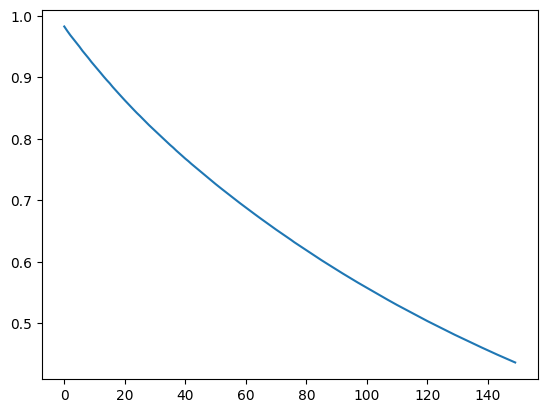

In [68]:
plt.plot(his.history['loss'])

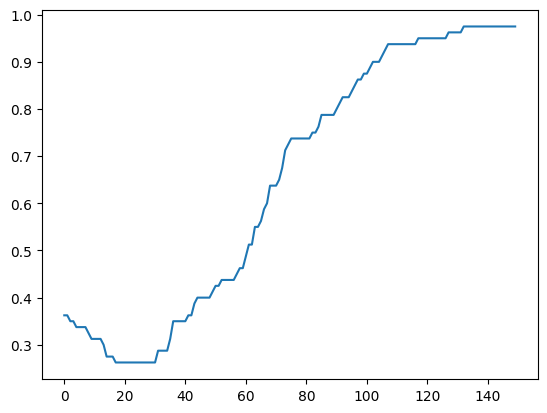

In [69]:
plt.plot(his.history['accuracy'])

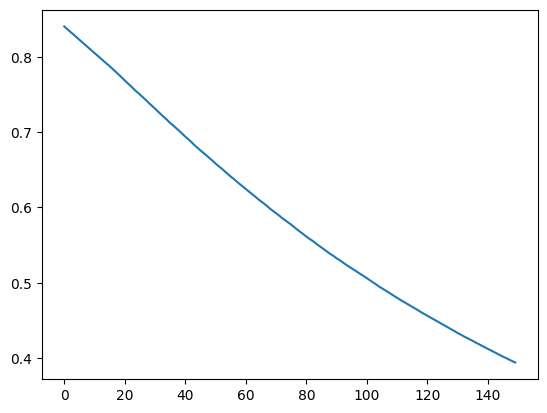

In [70]:
plt.plot(his.history['val_loss'])

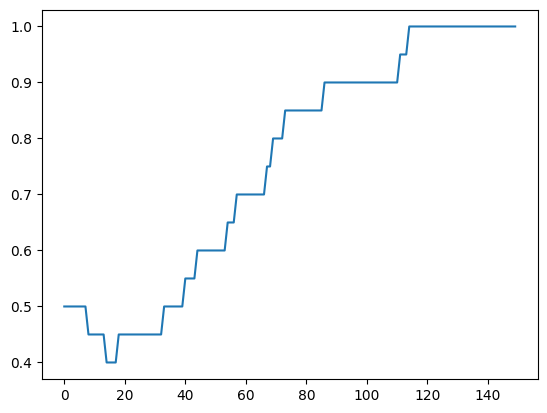

In [71]:
plt.plot(his.history['val_accuracy'])